<div style="text-align:center;">
<img src="https://upload.wikimedia.org/wikipedia/en/thumb/d/df/Bundesliga_logo_%282017%29.svg/1200px-Bundesliga_logo_%282017%29.svg.png" height="300px" width="300px" alt="Bundesliga Logo">
</div>

<h1>2022–23 Bundesliga</h1>


The 2022–23 Bundesliga was the 60th season of the Bundesliga, Germany's premier football competition. It began on 5 August 2022 and concluded on 27 May 2023.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Installing and Importing required libraries</li>
        <li>Using Webscraping to Extract German football league Data Example</li>
        <li>Visualizing League data</li>
        <li>Using web Scrapping to extract Player data</li>
        <li>Visualizing Player Data</li>
        <li>Visualizing League data</li>
    </ul>
<p>
    Estimated Time Needed: <strong>2.5 hrs</strong></p>
</div>

<hr>


<strong>This is an example of extracting and evaluating datasets through webscrapping. The following code is evaluated over two
datasets from different websites.</strong><br><br>
The first one is the final <em>Points Table</em> (Dataset 1) and the second one is the final <em>Goals scored by team table</em>
(Dataset 2)

## Installing and Impoting required libraries

In [1]:
!pip install pandas==1.3.3
#!pip install requests==2.26.0
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y
!pip install lxml==4.6.4
!pip install plotly==5.3.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 66.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com

In [2]:
!pip install matplotlib==3.2.2
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 56.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3


In [83]:
!pip install numpy

In [84]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from bs4 import BeautifulSoup

## Using Webscraping to Extract German football league Data Example


First we must use the `request` library to downlaod the webpage, and extract the text. We will extract data from
<br>wikipedia.com [https://en.wikipedia.org/wiki/2022%E2%80%9323_Bundesliga](https://en.wikipedia.org/wiki/2022%E2%80%9323_Bundesliga)
and mykhel.com <br> 
[https://www.mykhel.com/football/bundesliga-team-stats-l22/](https://www.mykhel.com/football/bundesliga-team-stats-l22/)


In [68]:
url = "https://en.wikipedia.org/wiki/2022%E2%80%9323_Bundesliga"
url2 = "https://www.mykhel.com/football/bundesliga-team-stats-l22/"
data  = requests.get(url).text
data2 = requests.get(url2).text

Next we must parse the text into html using `beautiful_soup`


In [59]:
soup = BeautifulSoup(data, 'html5lib')
soup2 = BeautifulSoup(data2, 'html5lib')

### DataSet 1

In [6]:
# we can see how many tables were found by checking the length of the tables list
tables = soup.find_all('table') 
len(tables)

31

Here we are looking for the `2022–23 Bundesliga` table, we can look through the tables list and find the right one we are look for based on the data in each table or we can search for the table name if it is in the table but this option might not always work, well then in that case just like in here we search for a string `Qualification or relegation` specific to this table only.

In [7]:
for index,table in enumerate(tables):
    if ("Qualification or relegation" in str(table)):
        table_index = index
print(table_index)

7


In [8]:
Bundesliga_data = pd.DataFrame(columns=["Pos", "Pld", "W" ,"D" , "L" , "GF" , "GA" , "GD" , "Pts"])
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Pos = col[0].text.strip()
        Pld = col[1].text.strip()
        W = col[2].text.strip()
        D = col[3].text.strip()
        L = col[4].text.strip()
        GF = col[5].text.strip()
        GA = col[6].text.strip()
        GD = col[7].text.strip()
        Pts = col[8].text.strip()
        Bundesliga_data = Bundesliga_data.append({"Pos":Pos, "Pld":Pld, "W":W, "D":D , "L":L , "GF":GF , "GA":GA , "GD":GD,"Pts":Pts}, ignore_index=True)
    
Bundesliga_data

,Pos,Pld,W,D,L,GF,GA,GD,Pts
0,1,34,21,8,5,92,38,+54,71
1,2,34,22,5,7,83,44,+39,71
2,3,34,20,6,8,64,41,+23,66
3,4,34,18,8,8,51,38,+13,62
4,5,34,17,8,9,51,44,+7,59
5,6,34,14,8,12,57,49,+8,50
6,7,34,13,11,10,58,52,+6,50
7,8,34,13,10,11,57,48,+9,49
8,9,34,12,10,12,54,55,−1,46
9,10,34,11,10,13,52,55,−3,43


Adding a new column 'Teams' at a specific position (index 1)

In [9]:
new_column = ["Bayern Munich","Borussia Dortmund","RB Leipzig","Union Berlin","SC Freiburg","Bayer Leverkusen","Eintracht Frankfurt","VfL Wolfsburg","Mainz 05","Borussia Mönchengladbach","FC Köln","1899 Hoffenheim","Werder Bremen","VfL Bochum","FC Augsburg","VfB Stuttgart","Schalke 04 ","Hertha BSC"]
column_name = 'Teams'
position = 1
Bundesliga_data.insert(position, column_name, new_column)
Bundesliga_data

,Pos,Teams,Pld,W,D,L,GF,GA,GD,Pts
0,1,Bayern Munich,34,21,8,5,92,38,+54,71
1,2,Borussia Dortmund,34,22,5,7,83,44,+39,71
2,3,RB Leipzig,34,20,6,8,64,41,+23,66
3,4,Union Berlin,34,18,8,8,51,38,+13,62
4,5,SC Freiburg,34,17,8,9,51,44,+7,59
5,6,Bayer Leverkusen,34,14,8,12,57,49,+8,50
6,7,Eintracht Frankfurt,34,13,11,10,58,52,+6,50
7,8,VfL Wolfsburg,34,13,10,11,57,48,+9,49
8,9,Mainz 05,34,12,10,12,54,55,−1,46
9,10,Borussia Mönchengladbach,34,11,10,13,52,55,−3,43


In [10]:
Bundesliga_data.shape

(18, 10)

Above code Provides an overview of the table showing it has 18 rows as records(no. of teams) in the table
and 11 gives us the no. of columns.

Displaying out the teams that would be competing for `European Championships`


In [11]:
Bundesliga_data.head(6)

,Pos,Teams,Pld,W,D,L,GF,GA,GD,Pts
0,1,Bayern Munich,34,21,8,5,92,38,+54,71
1,2,Borussia Dortmund,34,22,5,7,83,44,+39,71
2,3,RB Leipzig,34,20,6,8,64,41,+23,66
3,4,Union Berlin,34,18,8,8,51,38,+13,62
4,5,SC Freiburg,34,17,8,9,51,44,+7,59
5,6,Bayer Leverkusen,34,14,8,12,57,49,+8,50


In [12]:
print("Champions League group stage")
list(Bundesliga_data.loc[:3]['Teams'])


Champions League group stage


['Bayern Munich', 'Borussia Dortmund', 'RB Leipzig', 'Union Berlin']

In [13]:
print("Europa league group stage")
Bundesliga_data.loc[4]['Teams']

Europa league group stage


'SC Freiburg'

In [14]:
print("Europa Conference league play-off round")
Bundesliga_data.loc[5]['Teams']

Europa Conference league play-off round


'Bayer Leverkusen'

Below we create a dataframe for stadiums and there capacity

In [69]:
Stadium_data = pd.DataFrame(columns=["Team","Location","Stadium","Capacity"])

for row in tables[new_table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Team = col[0].text.strip()
        Location = col[1].text.strip()
        Stadium = col[2].text.strip()
        Capacity = col[3].text.strip()
        Stadium_data = Stadium_data.append({"Team":Team, "Location":Location, "Stadium":Stadium, "Capacity":Capacity}, ignore_index=True)
    
# Update a record at a specific index
index_to_update = 2
new_record = {'Team': 'Union Berlin', 'Location':'Berlin', 'Stadium': 'Stadion An der Alten Försterei', 'Capacity': '22,012'}
Stadium_data.loc[index_to_update] = new_record

Stadium_data

,Team,Location,Stadium,Capacity
0,FC Augsburg,Augsburg,WWK Arena,"30,660"
1,Hertha BSC,Berlin,Olympiastadion,"74,649"
2,Union Berlin,Berlin,Stadion An der Alten Försterei,"22,012"
3,VfL Bochum,Bochum,Vonovia Ruhrstadion,"27,599"
4,Werder Bremen,Bremen,Wohninvest Weserstadion,"42,100"
5,Borussia Dortmund,Dortmund,Signal Iduna Park,"81,365"
6,Eintracht Frankfurt,Frankfurt,Deutsche Bank Park,"51,500"
7,SC Freiburg,Freiburg im Breisgau,Europa-Park Stadion,"34,700"
8,1899 Hoffenheim,Sinsheim,PreZero Arena,"30,150"
9,1. FC Köln,Cologne,RheinEnergieStadion,"49,698"


### Dataset 2
Now we will be dealing with pretty much the same dataset but from a different website (Some columns will be different)

Here we are looking for the `2022–23 Bundesliga` table, we can look through the tables list and find the right one which, we are looking for .Based on the data in each table or we can search for the table name if it is in the table but this option might not always work, well then in that case just like in here, We search for a string `Average Conceded` specific to this table only.

In [89]:
tables2 = soup2.find_all('table') 
for index,table in enumerate(tables2):
    if ("Average Conceded" in str(table)):
        table_index2 = index
print(table_index2)

2


<strong>It should be noted that the Table generated below of the Budesliga Season 2022/2023 
is sorted according to "goals scored" not by "points" and is so 
not the final points table.</strong>

In [96]:
Bundesliga_data2 = pd.DataFrame(columns=["Team", "Matches", "Total Goals" ,"Average Goals" , "Goals Conceded" , "Average Conceded" , "Goal Difference"])
for row in tables2[table_index2].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Team = col[0].text.strip()
        Matches = col[1].text.strip()
        Total_Goals = col[2].text.strip()
        Average_Goals = col[3].text.strip()
        Goals_Conceded = col[4].text.strip()
        Average_Conceded = col[5].text.strip()
        Goal_Difference = col[6].text.strip()
        Bundesliga_data2 = Bundesliga_data2.append({"Team":Team, "Matches":Matches, "Total Goals":Total_Goals , "Average Goals":Average_Goals, "Goals Conceded":Goals_Conceded , "Average Conceded":Average_Conceded , "Goal Difference":Goal_Difference}, ignore_index=True)


Bundesliga_data2

,Team,Matches,Total Goals,Average Goals,Goals Conceded,Average Conceded,Goal Difference
0,FC Bayern Muenchen,34,92,2.71,38,1.12,54
1,Borussia Dortmund,34,83,2.44,44,1.29,39
2,RB Leipzig,34,64,1.88,41,1.21,23
3,Eintracht Frankfurt,34,58,1.71,52,1.53,6
4,Bayer 04 Leverkusen,34,57,1.68,49,1.44,8
5,VfL Wolfsburg,34,57,1.68,48,1.41,9
6,1. FSV Mainz 05,34,54,1.59,55,1.62,-1
7,Borussia Moenchengladbach,34,52,1.53,55,1.62,-3
8,1. FC Union Berlin,34,51,1.50,38,1.12,13
9,SV Werder Bremen,34,51,1.50,64,1.88,-13


## Visualizing League data

### Dataset 1

Now we will convert the data-type of certain columns so that we can plot them over 
graphs. We will be type-casting them from `string` to an `int` datatype.
Below is the code to do the following. The `error='coerce'` parameter is given 
to replace all those values with `NaN` if they cannot be converted

In [15]:
Bundesliga_data['Pos'] = pd.to_numeric(Bundesliga_data['Pos'], errors='coerce')
Bundesliga_data['W'] = pd.to_numeric(Bundesliga_data['W'], errors='coerce')
Bundesliga_data['D'] = pd.to_numeric(Bundesliga_data['D'], errors='coerce')
Bundesliga_data['L'] = pd.to_numeric(Bundesliga_data['L'], errors='coerce')
Bundesliga_data['GF'] = pd.to_numeric(Bundesliga_data['GF'], errors='coerce')
Bundesliga_data['GA'] = pd.to_numeric(Bundesliga_data['GA'], errors='coerce')
Bundesliga_data['PTs'] = pd.to_numeric(Bundesliga_data['Pts'], errors='coerce')

Creating a list of all columns in the table so that they can be used 
in creating of plots

In [16]:
Position_list = list(Bundesliga_data['Pos'])
Teams_list = list(Bundesliga_data['Teams'])
Wins_list = list(Bundesliga_data['W'])
Draws_list = list(Bundesliga_data['D'])
Losses_list = list(Bundesliga_data['L'])
Goals_forwareded_list = list(Bundesliga_data['GF'])
Goals_Accepted_list = list(Bundesliga_data['GA'])
Goal_Difference_list_strings = list(Bundesliga_data['GD'])
Points_list = list(Bundesliga_data['Pts'])


As we can see in the code above the `GD` has been stored as a list of strings whereas all others are numeric. This is
because `GD` can be both positive and negative and so it requires to be treated specially. Hence we stored the no.s with
the `+` sign as a positive number and a `-` sign as a negative number.

In [17]:
# for GD

Goal_Difference_list = [int(num[1:]) if num[0] == '+' else -int(num[1:]) for num in Goal_Difference_list_strings]
Goal_Difference_list

[54, 39, 23, 13, 7, 8, 6, 9, -1, -3, -5, -9, -13, -32, -21, -12, -36, -27]

Single Graph that only contains data about the wins in the league

[]

<Figure size 3600x500 with 0 Axes>

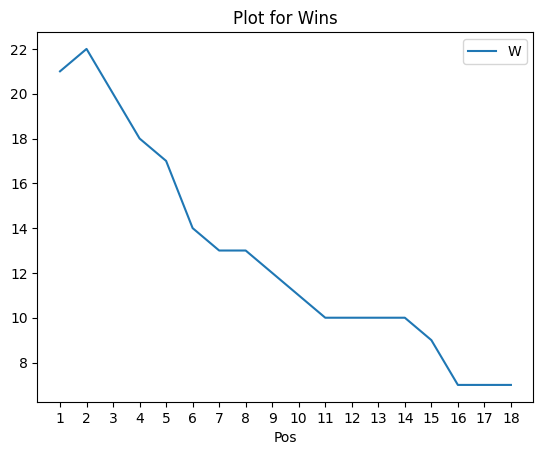

In [18]:
plt.figure(figsize=(36, 5))
Bundesliga_data.plot(x="Pos", y="W")
plt.title('Plot for Wins')
plt.xticks(Position_list)
plt.plot()

Side-by-Side Graphs tht contain data about Wins, Losses and Draws in the league

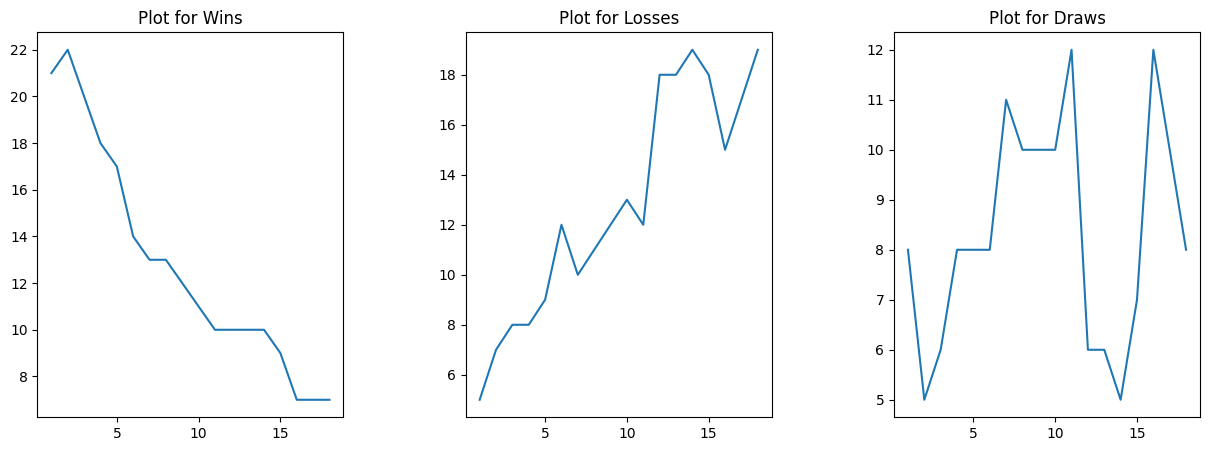

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust the number of subplots and figure size as per your requirements

# Plot the first subplot
axes[0].plot(Position_list,Wins_list)
axes[0].set_title('Plot for Wins')

# Plot the second subplot
axes[1].plot(Position_list,Losses_list)
axes[1].set_title('Plot for Losses')

# Plot the third subplot
axes[2].plot(Position_list,Draws_list)
axes[2].set_title('Plot for Draws')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)
plt.show()

<summary>Additional way of making the plot above by seaborn</summary>
<details>
 Create the subplots using seaborn
 fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 

 Plot the first subplot using seaborn
 sb.lineplot(x=Position_list, y=Wins_list, ax=axes[0])
 axes[0].set_title('Plot 1')

 Plot the second subplot using seaborn
 sb.lineplot(x=Position_list, y=Draws_list, ax=axes[1])
 axes[1].set_title('Plot 2')

 Plot the third subplot using seaborn
 sb.lineplot(x=Position_list, y=Losses_list, ax=axes[2])
 axes[2].set_title('Plot 3')

 Adjust the spacing between subplots
 plt.subplots_adjust(wspace=0.4)  # Adjust the spacing as per your requirements

 Display the plots
 plt.show()
</details>

Single Plot that contains Wins, Losses and Draws of all the teams in the league

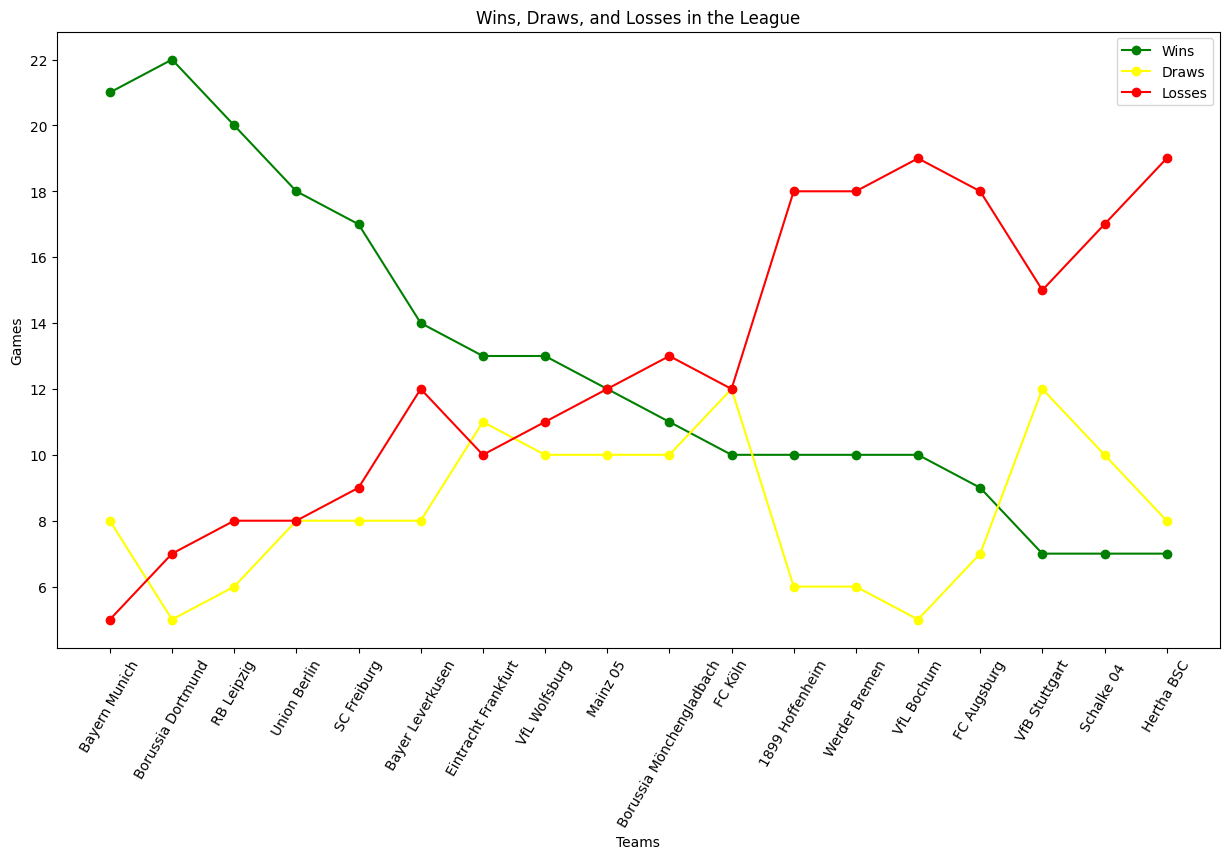

In [20]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the number of wins
ax.plot(Teams_list, Wins_list, color='green', marker='o', label='Wins')

# Plot the number of draws
ax.plot(Teams_list, Draws_list, color='yellow', marker='o', label='Draws')

# Plot the number of losses
ax.plot(Teams_list, Losses_list, color='red', marker='o', label='Losses')

# Add labels and title
ax.set_xlabel('Teams')
ax.set_ylabel('Games')
ax.set_title('Wins, Draws, and Losses in the League')

#To make sure all values of yaxis are of integer types and not in float
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Add a legend
ax.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=60)

# Display the plot
plt.show()

Below given is the Single plot for `GF`,`GA` and `GD` where:<br>
`GF` :- Goal Forwarded<br>
`GA` :- Goals Accepted<br>
`GD` :- Goal Difference is represented in a bar graph

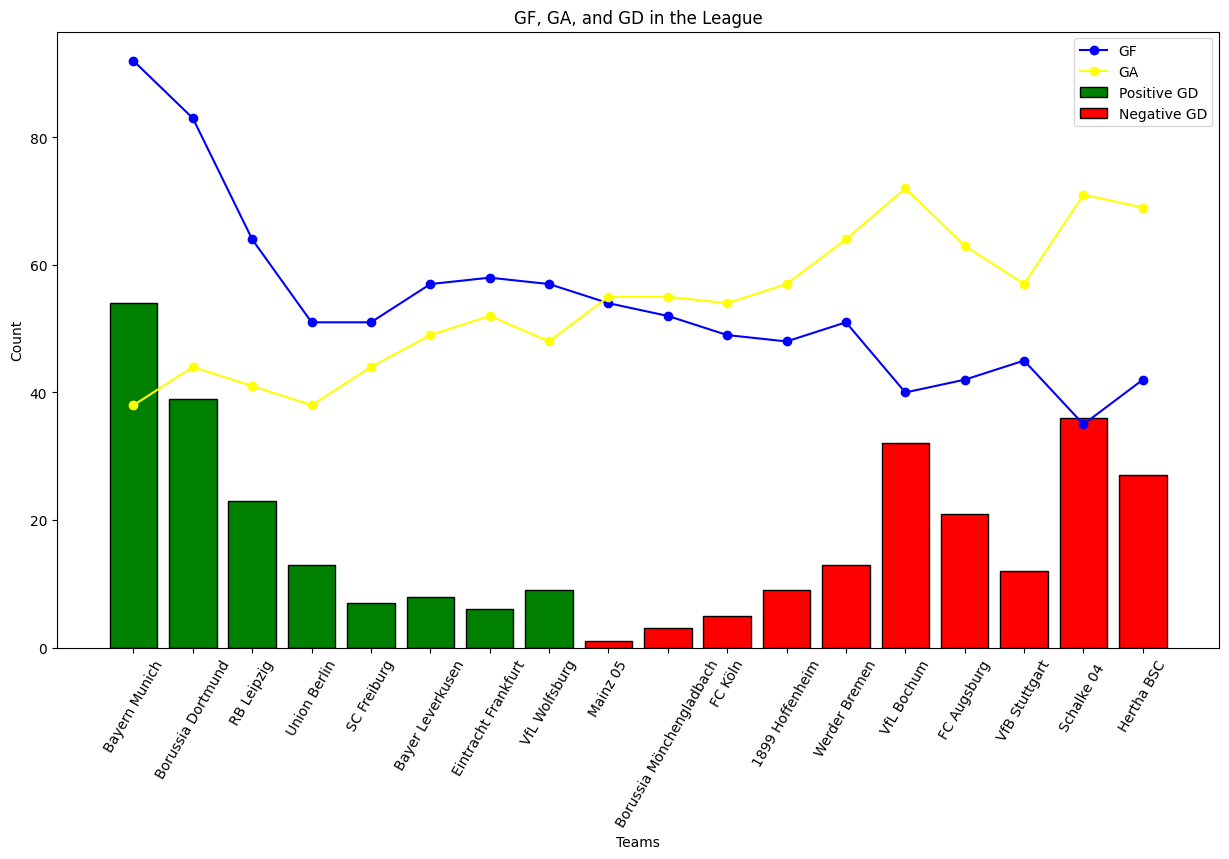

In [21]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the number of wins
ax.plot(Teams_list, Goals_forwareded_list, color='blue', marker='o', label='GF')

# Plot the number of draws
ax.plot(Teams_list, Goals_Accepted_list, color='yellow', marker='o', label='GA')

# Plot GD (Goal Difference)
positive_gd = [gd if gd >= 0 else 0 for gd in Goal_Difference_list]
negative_gd = [abs(gd) if gd < 0 else 0 for gd in Goal_Difference_list]

ax.bar(Teams_list, positive_gd, color='green', edgecolor='black', label='Positive GD')
ax.bar(Teams_list, negative_gd, color='red', edgecolor='black', label='Negative GD')

# Add labels and title
ax.set_xlabel('Teams')
ax.set_ylabel('Count')
ax.set_title('GF, GA, and GD in the League')

#To make sure all values of yaxis are of integer types and not in float
#plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Add a legend
ax.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=60)

# Display the plot
plt.show()


In the graph above we can see that the difference between the blue point(`GF`) and the yellow
point(`GA`) reflects the height of the bar graph(`GD`). Hence from the graph we can conclude that 
 `GD = GF - GA`

#### Now we will be creating a plot for the team stadiums and there capacity


Calculating the index of the table who's data has to be evaluated.
Here we are using, `Capacity` as a specific and unique string to find our 
required table


In [22]:
for index,table in enumerate(tables):
    if ("Capacity" in str(table)):
        new_table_index = index
print(new_table_index)

4


Creating a dataframe out of the table and structuring it properly

In [23]:
Stadium_data = pd.DataFrame(columns=["Team","Location","Stadium","Capacity"])

for row in tables[new_table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Team = col[0].text.strip()
        Location = col[1].text.strip()
        Stadium = col[2].text.strip()
        Capacity = col[3].text.strip()
        Stadium_data = Stadium_data.append({"Team":Team, "Location":Location, "Stadium":Stadium, "Capacity":Capacity}, ignore_index=True)
    
# Update a record at a specific index
index_to_update = 2
new_record = {'Team': 'Union Berlin', 'Location':'Berlin', 'Stadium': 'Stadion An der Alten Försterei', 'Capacity': '22,012'}
Stadium_data.loc[index_to_update] = new_record

Stadium_data

,Team,Location,Stadium,Capacity
0,FC Augsburg,Augsburg,WWK Arena,"30,660"
1,Hertha BSC,Berlin,Olympiastadion,"74,649"
2,Union Berlin,Berlin,Stadion An der Alten Försterei,"22,012"
3,VfL Bochum,Bochum,Vonovia Ruhrstadion,"27,599"
4,Werder Bremen,Bremen,Wohninvest Weserstadion,"42,100"
5,Borussia Dortmund,Dortmund,Signal Iduna Park,"81,365"
6,Eintracht Frankfurt,Frankfurt,Deutsche Bank Park,"51,500"
7,SC Freiburg,Freiburg im Breisgau,Europa-Park Stadion,"34,700"
8,1899 Hoffenheim,Sinsheim,PreZero Arena,"30,150"
9,1. FC Köln,Cologne,RheinEnergieStadion,"49,698"


Removing commas from the data in `Capacity` column and also casting them 
form `String` to an `int`

In [24]:
# Remove commas from numbers and cast them as integers
Stadium_data['Capacity'] = Stadium_data['Capacity'].str.replace(',', '').astype(int)

Now we will be creating a plot of the given dataframe to visualize 
the teams with there stadium capacity.


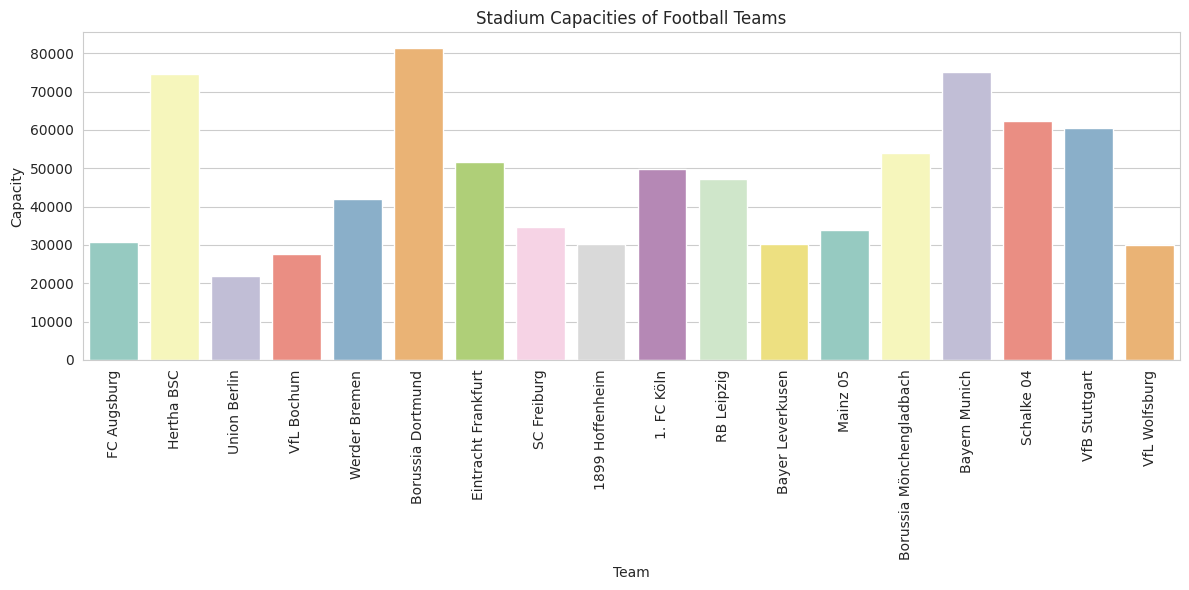

In [25]:
sb.set_style('whitegrid')

plt.figure(figsize=(12, 6))
sb.barplot(data=Stadium_data, x='Team', y='Capacity', palette='Set3')
plt.xticks(rotation=90)
plt.title('Stadium Capacities of Football Teams')
plt.xlabel('Team')
plt.ylabel('Capacity')
plt.tight_layout()
plt.show()


### Dataset 2

Given below is the pie-chart for Proportion of Goals scored by each team in the bundesliga

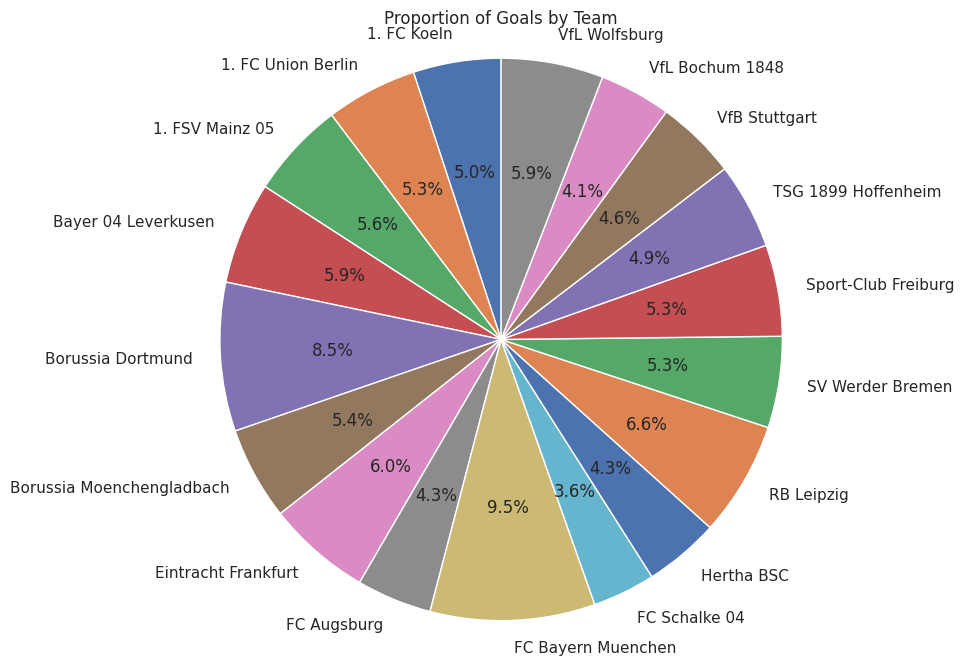

In [73]:
# Group the data by team and calculate the sum of goals
goals_by_team = Bundesliga_data2.groupby('Team')['Total Goals'].sum()

# Set the figure size
plt.figure(figsize=(8, 8))

# Create the pie chart
plt.pie(goals_by_team, labels=goals_by_team.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Goals by Team')

# Ensure the pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()

Below is the code for typecasting data to `numeric` for futher implementation during plots

In [76]:
Bundesliga_data2['Average Goals'] = pd.to_numeric(Bundesliga_data2['Average Goals'], errors='coerce')
Bundesliga_data2['Average Conceded'] = pd.to_numeric(Bundesliga_data2['Average Conceded'], errors='coerce')

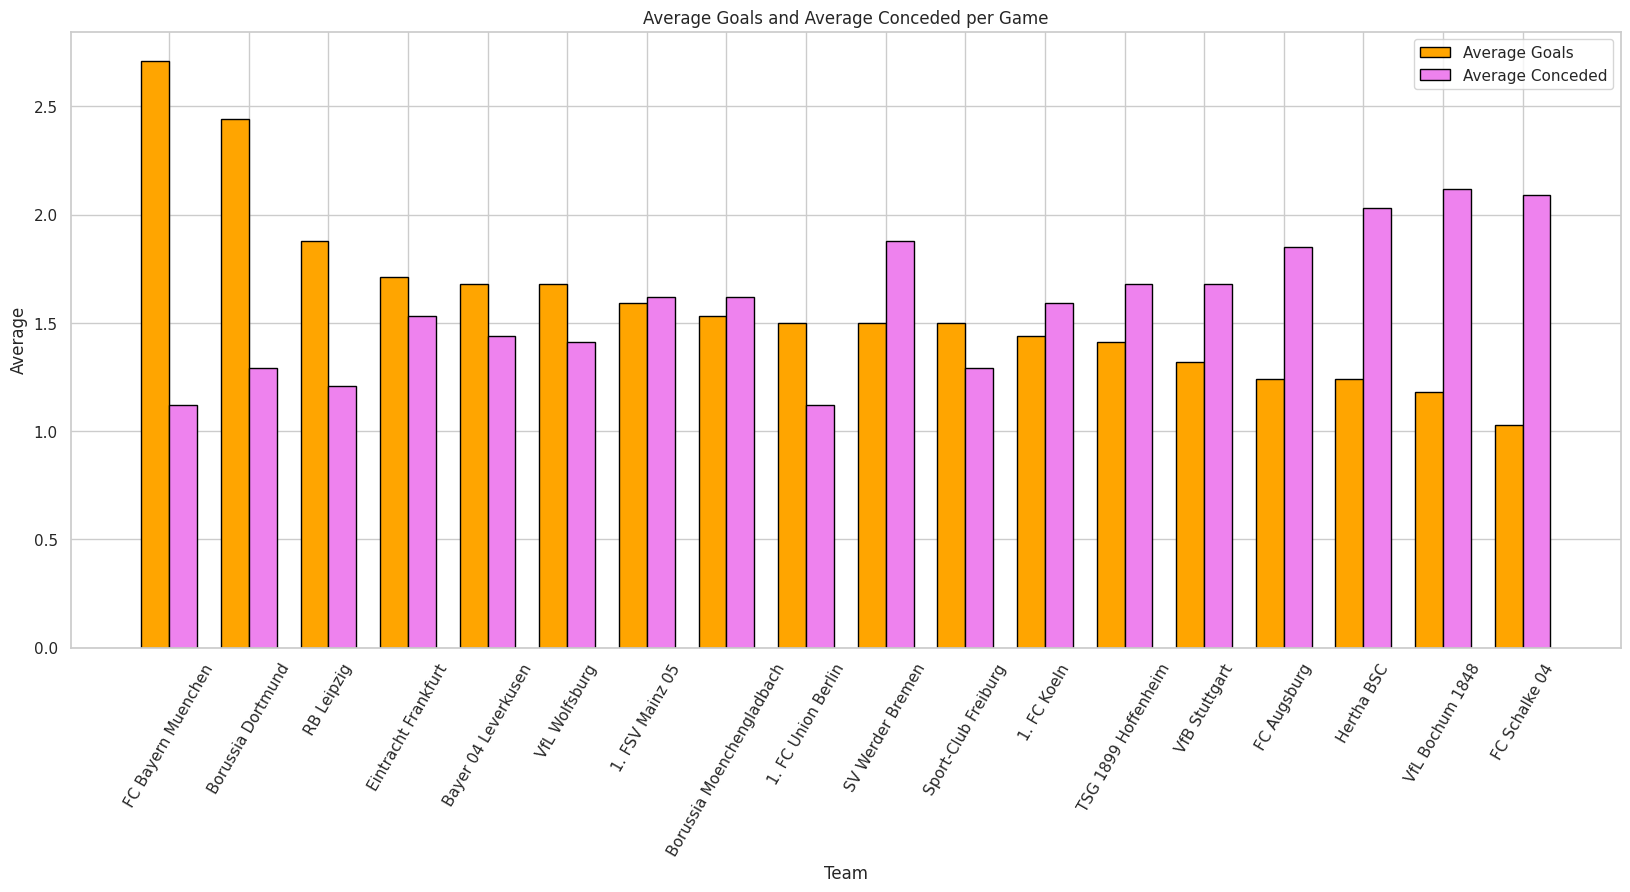

In [87]:
# Set the figure size
plt.figure(figsize=(20, 8))

# Set style
sb.set(style='whitegrid')

# Set the bar width
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(Bundesliga_data2['Team']))
r2 = [x + bar_width for x in r1]

# Create the bar plot
plt.bar(r1, Bundesliga_data2['Average Goals'], color='orange', width=bar_width, edgecolor='black', label='Average Goals')
plt.bar(r2, Bundesliga_data2['Average Conceded'], color='violet', width=bar_width, edgecolor='black', label='Average Conceded')

# Customize the plot
plt.title('Average Goals and Average Conceded per Game')
plt.xlabel('Team')
plt.ylabel('Average')
plt.xticks([r + bar_width/2 for r in range(len(Bundesliga_data2['Team']))], Bundesliga_data2['Team'])

# Rotate the x-axis labels for better readability
plt.xticks(rotation=60)

# Add legend
plt.legend()

# Display the plot
plt.show()


Given bar chart above represents two kinds of data one the `Average goals scored` per game in the `orange` color
and `Average goals conceded` per game in the `purple` color

## Using web Scrapping to extract Player data

In [29]:
player_url = "https://www.mykhel.com/football/bundesliga-player-stats-l22/"

player_data  = requests.get(player_url).text

In [30]:
soup_new = BeautifulSoup(player_data,'html5lib')

In [31]:
# we can see how many tables were found by checking the length of the tables list
p_tables = soup_new.find_all('table') 
len(p_tables)

8

In [56]:
for index,table in enumerate(p_tables):
    if ("Time Played" in str(table)):
        p_table_index = index
print(p_table_index)

0


In [44]:
Overview_data = pd.DataFrame(columns=["Player Name", "Team", "Matches" ,"Goals" , "Assists", "Time Played"])
for row in p_tables[p_table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Player_Name = col[0].text.strip()
        Team = col[1].text.strip()
        Matches = col[2].text.strip()
        Goals = col[3].text.strip()
        Time_Played = col[4].text.strip()
        Overview_data = Overview_data.append({"Player Name":Player_Name, "Team":Team, "Matches":Matches, "Goals":Goals ,"Time Played":Time_Played}, ignore_index=True)


Assists_list = []
for row in p_tables[2].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Assists = col[4].text.strip()
        Assists_list.append(Assists)
        

Overview_data['Assists'] = Assists_list
Overview_data

,Player Name,Team,Matches,Goals,Assists,Time Played
0,Christopher Nkunku,RB Leipzig,25,16,4,1898 Mins
1,Niclas Fuellkrug,SV Werder Bremen,28,16,5,2479 Mins
2,Vincenzo Grifo,Sport-Club Freiburg,33,15,5,2425 Mins
3,Randal Kolo Muani,Eintracht Frankfurt,32,15,11,2646 Mins
4,Serge Gnabry,FC Bayern Muenchen,34,14,5,1939 Mins
5,Marcus Thuram,Borussia Moenchengladbach,30,13,6,2517 Mins
6,Andrej Kramaric,TSG 1899 Hoffenheim,32,12,3,2394 Mins
7,Marvin Ducksch,SV Werder Bremen,34,12,6,2863 Mins
8,Jonas Hofmann,Borussia Moenchengladbach,31,12,9,2684 Mins
9,Jamal Musiala,FC Bayern Muenchen,33,12,10,2211 Mins


## Visualizing Player Data

In [45]:
Overview_data['Goals'] = pd.to_numeric(Overview_data['Goals'], errors='coerce')
Overview_data['Matches'] = pd.to_numeric(Overview_data['Matches'], errors='coerce')
Overview_data['Assists'] = pd.to_numeric(Overview_data['Assists'], errors='coerce')

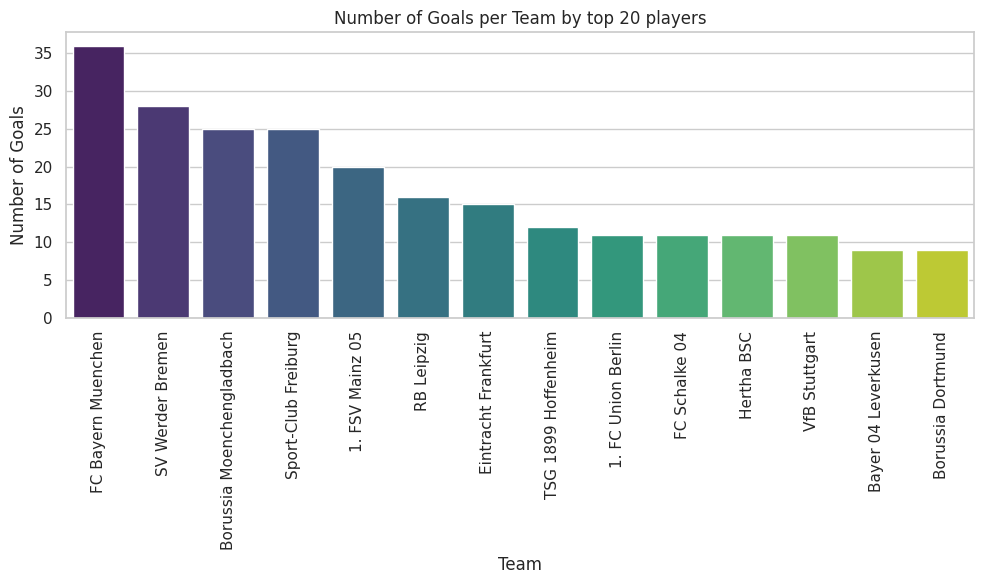

In [57]:
# Group the data by team and calculate the sum of goals
goals_per_team = Overview_data.groupby('Team')['Goals'].sum().reset_index()

# Sort the data by the number of goals in descending order
goals_per_team = goals_per_team.sort_values(by='Goals', ascending=False)

# Set the seaborn style
sb.set_style('whitegrid')

# Create the bar plot
plt.figure(figsize=(10, 6))
sb.barplot(data=goals_per_team, x='Team', y='Goals', palette='viridis')
plt.xticks(rotation=90)
plt.title('Number of Goals per Team by top 20 players')
plt.xlabel('Team')
plt.ylabel('Number of Goals')
plt.tight_layout()
plt.show()

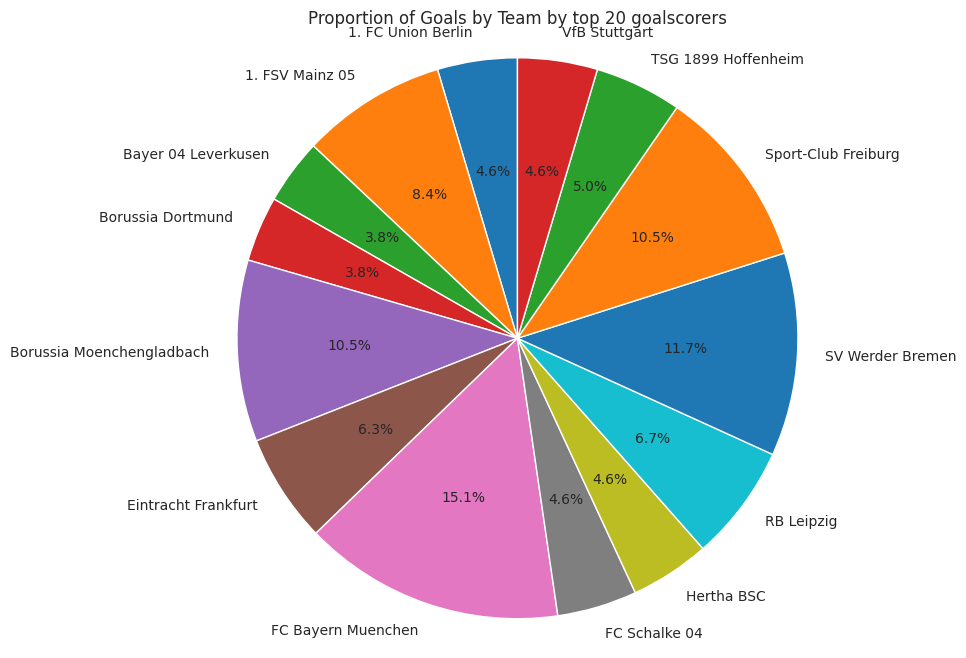

In [51]:
# Group the data by team and calculate the sum of goals
goals_per_team = Overview_data.groupby('Team')['Goals'].sum()

# Set the figure size
plt.figure(figsize=(8, 8))

# Create the pie chart
plt.pie(goals_per_team, labels=goals_per_team.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Goals by Team by top 20 goalscorers')

# Ensure the pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()


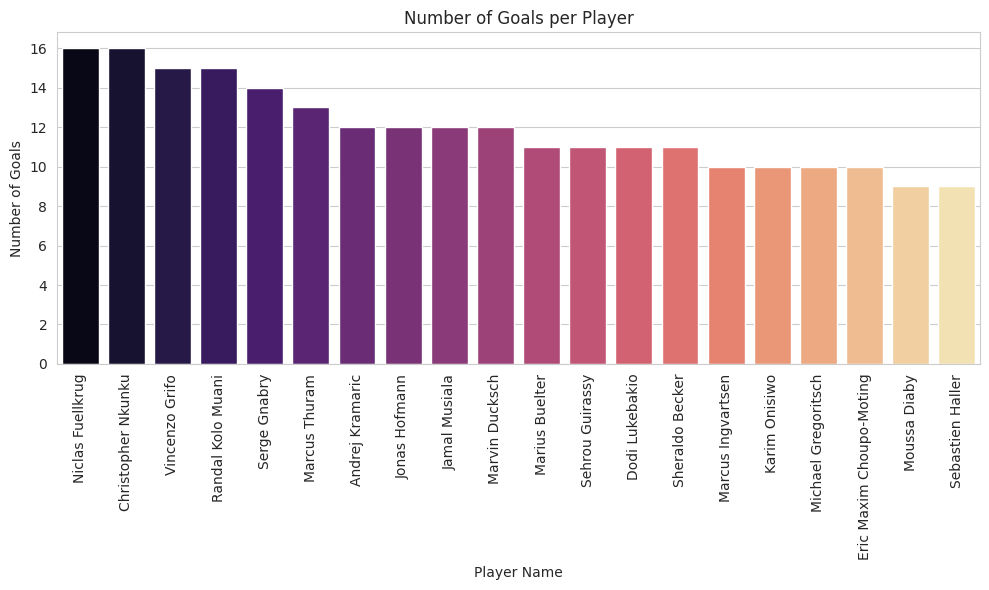

In [48]:
# Group the data by player name and calculate the sum of goals
goals_per_player = Overview_data.groupby('Player Name')['Goals'].sum().reset_index()

# Sort the data by the number of goals in descending order
goals_per_player = goals_per_player.sort_values(by='Goals', ascending=False)

# Set the seaborn style
sb.set_style('whitegrid')

# Create the bar plot
plt.figure(figsize=(10, 6))
sb.barplot(data=goals_per_player, x='Player Name', y='Goals', palette='magma')
plt.xticks(rotation=90)
plt.title('Number of Goals per Player')
plt.xlabel('Player Name')
plt.ylabel('Number of Goals')
plt.tight_layout()
plt.show()


In [49]:
Overview_data['Time Played'] = Overview_data['Time Played'].str.replace('Mins', '').astype(int)

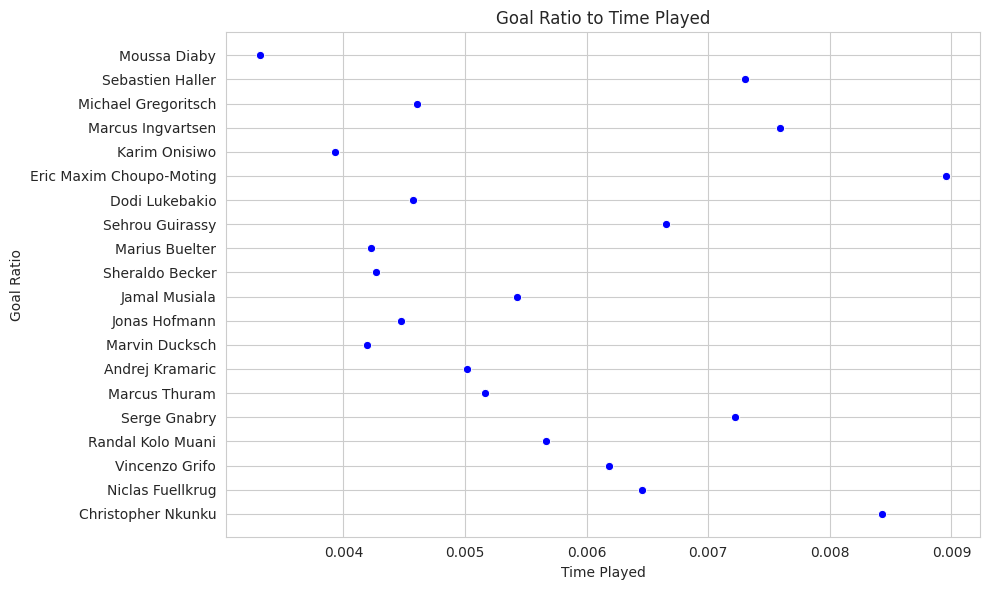

In [50]:

# Assuming you have a DataFrame 'df' (Overview_data) with 'Goals' and 'Time Played' columns

# Calculate the goal ratio by dividing goals by time played
Goal_Ratio = list(Overview_data['Goals'] / Overview_data['Time Played'])

# Set the seaborn style
sb.set_style('whitegrid')

# Create the scatter plot
plt.figure(figsize=(10, 6))
sb.scatterplot(data=Overview_data, x=Goal_Ratio, y='Player Name', color='blue')
plt.title('Goal Ratio to Time Played')
plt.xlabel('Time Played')
plt.ylabel('Goal Ratio')
plt.tight_layout()
plt.show()


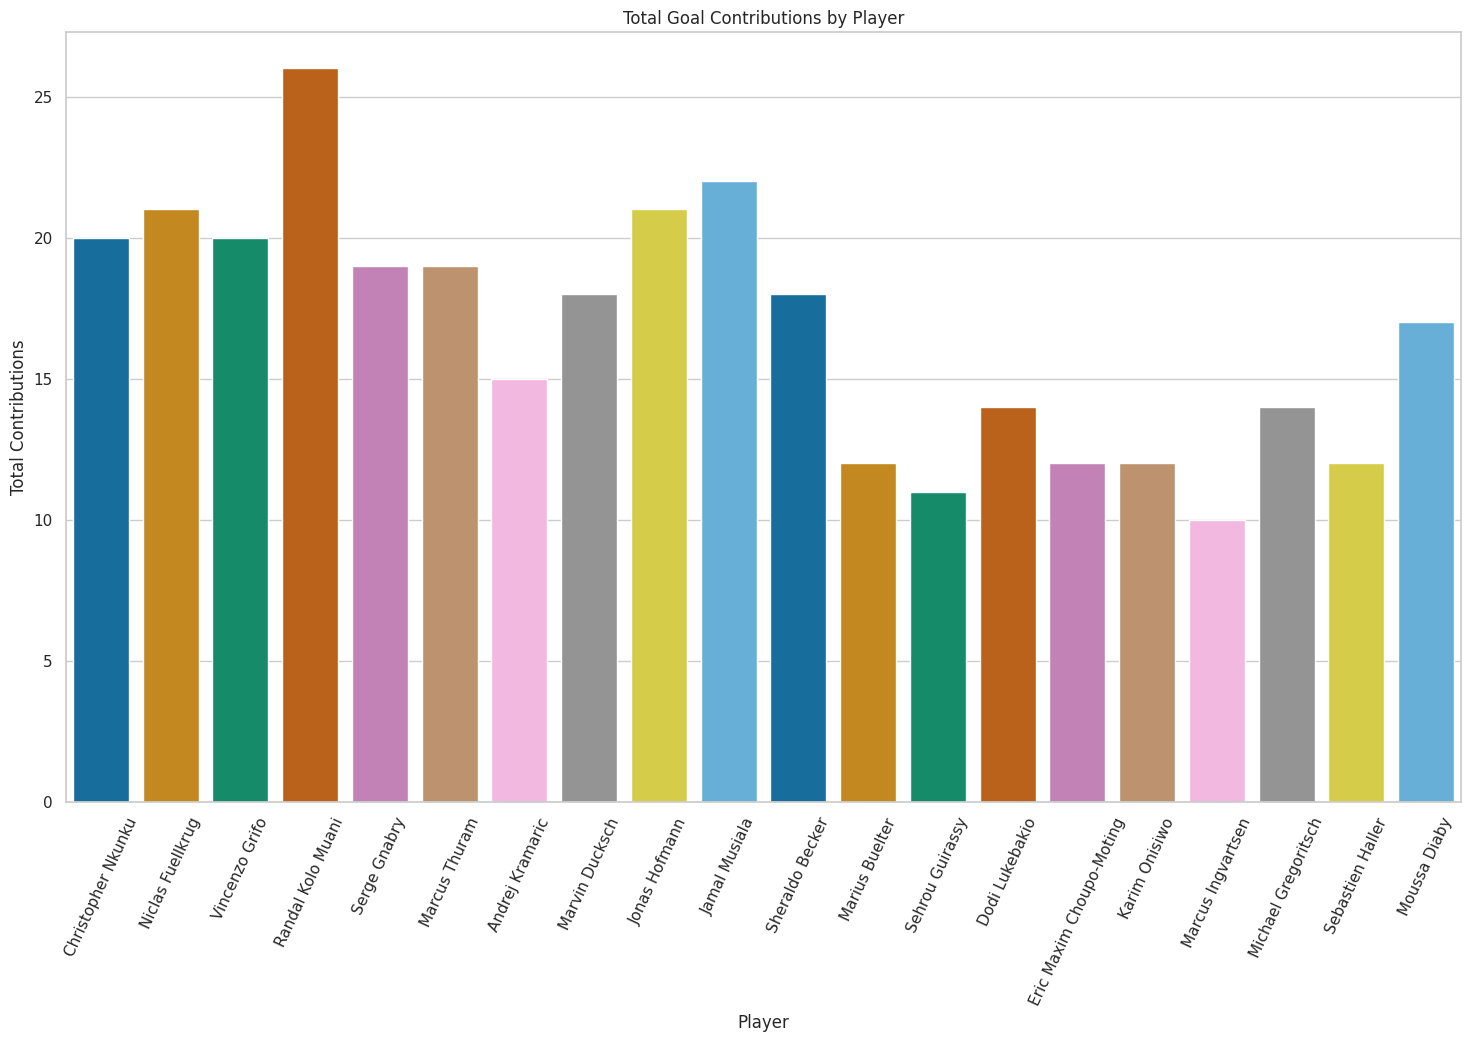

In [55]:


# Calculate total goal contributions
Total_Contributions = list(Overview_data['Goals'] + Overview_data['Assists'])

# Set the figure size
plt.figure(figsize=(18, 10))

# Set style
sb.set(style='whitegrid')

# Create a bar plot
ax = sb.barplot(x='Player Name', y=Total_Contributions, data=Overview_data, palette='colorblind')

# Customize the plot
ax.set_title('Total Goal Contributions by Player')
ax.set_xlabel('Player')
ax.set_ylabel('Total Contributions')

# Rotate x-axis labels if needed
plt.xticks(rotation=65)

# Display the plot
plt.show()


<h2>About me:</h2>
Ladies and gentlemen, I am  
<a href="https://www.linkedin.com/in/dev-agnihotri/">Dev Agnihotri</a> a young data analyst, here to share my recent adventure with the "Bundesliga 2022/2023" dataset. As I delved into its depths, I marveled at the fierce battles, the unexpected triumphs, and the dazzling skills displayed by the football stars. It was a symphony of data and analysis, reminding me of the wisdom of Abraham Lincoln: "The best way to predict your future is to create it." Join me on this journey, as we embrace the power of data and the beauty of the game. 


## Final Log

| Date (YYYY-MM-DD) |   Made By        |   Subject                  |
| ----------------- | ---------------- | -------------------------  |
| 2023-02-06        |  Dev Agnihotri   | Bundesliga season 2022/2023|


<hr>

## <h3 align="center"> I would love if you share with me your experience viewing my analysis <h3/>
<h4 align="center"><a href="https://devagnihotri.github.io/AGNIHOTRI/contact.html">Let's Talk</a></h4>

<p>
